Esta jupyter notebook foi desenvolvida pelos estudantes do curso de Bacharelado em Ciência da Computação que cursaram a disciplina no ano de 2024.

Créditos para: 

[Ayrton da Costa Ganem Filho](https://github.com/A1RT0N)

[Bruno Figueiredo Lima](https://github.com/bruno-lim4 )

[Gabriel Antunes Afonso de Araujo](https://github.com/GabrielAntunes34)


# Relembrando método dos mínimos quadrados

### Objetivo
Encontrar o conjunto de parâmetros $\vec{a} = (a_0, a_1, ..., a_M)$ de um modelo $f(x; \vec{a})$ que minimiza o quadrado das distâncias $r_i = y_i - f(x_i; \vec{a})$ entre os pontos $y_i$ observados e o modelo, usando as observações $x_i$ como entrada.

### Função a ser minimizada
$$ S = \sum_{i=1}^{N}  r_i^2 $$

### Condição de Mínimo
$$ \frac{\partial S}{\partial \alpha_m} = 0 \quad \forall m $$

### Cálculo dos Coeficientes
Para uma reta $y = a + bx$:
$$ b = \frac{N S_{xy} - S_x S_y}{N S_{xx} - S_x^2} $$
$$ a = \bar{y} - b \bar{x} $$


### Coeficiente $R$
$$ R = \frac{\sum_{i=1}^N (x_i-\bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{j=1}^N (x_j-\bar{x})^2} \sqrt{\sum_{l=1}^N (y_l-\bar{y})^2}} $$

### Erros nos Parâmetros do Ajuste

Distância do ponto observado $y_i$ para $x_i$ e o valor de acordo com o modelo $y_i' = b x_i + a$:
$$ r_i = y_i - y_i' $$

Estimador para a variância:
$$ \Delta y = \sqrt{\sum_{i=1}^N \frac{r_i^2}{N-2}} $$

Erros para os coeficientes $a$ e $b$:
$$ \Delta b = \frac{\Delta y}{\sqrt{ S_{xx} - \frac{S_x^2}{N}}} $$
$$ \Delta a = \Delta b \sqrt{\frac{S_{xx}}{N}} $$


# Relembrando desvio padrão

Dado um conjunto de medidas $x_i$, temos que seu desvio padrão $\sigma$ é dado por

$$ \sigma = \sqrt \frac{\sum (x_i - \overline{x})^2}{N-1}$$

Agora, vamos à prática:



### Pacotes python para a prática

Para essa prática, será usado as bibliotecas da prática 3, já disponibilizada pela professora Krissia. Além disso, usarei uma biblioteca do IFSC de cálculo de erros.

# Prática 5

Na prática 5, será medido a energia mecânica em diversas situações.

1. **Cálculo do coeficiente elástico**: Dada um corpo com uma altura $h$ do solo, uma massa $m$, com uma mola com coeficiente $k$ e elongação $L$, com o corpo com uma velocidade $v$, sua energia mecânica pode ser calculada por:

$$
    E = \frac{m v^2}{2} + mgh + \frac{k L^2}{2}
$$

Para a representação das configurações a e b. temos a seguinte imagem:

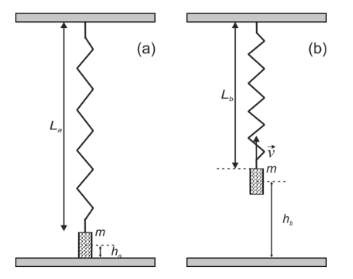

No caso da configuração $a$, temos:

$$
    E_a = mgh_a + \frac{k (L_a-L_o)^2}{2}
$$

No caso da configuração $b$, temos:

$$
    E_b = \frac{m v^2}{2} + mgh_b + \frac{k (L_b-L_o)^2}{2}
$$


Para o início do experimento, precisamos calcular o valor de $k$ para começar a fazer os cálculos da energia mecânica. Para isso, igualamos a força elástica com a força peso

$$
    k(L-L_0) = mg
$$

O coeficiente angular dessa reta de Peso por elongação, temos que: 

$$b = \frac{mg}{L-L_0}$$ 

Isso nos possibilitará calcular o coeficiente angular.

Os erros dessas medidas são dados pelo método dos mínimos quadrados, considerando que o o comprimento da massa será medida com uma trena de erro 1 mm e uma balança para saber o peso de $m$, cuja precisão é 0,00001 kg.


2. **Energia cinética**: para o cálculo da energia cinética, irá se realizar o mesmo experimento, no caso, um corpo é solto do chão e passa por um laser que mede o tempo em que esse objeto passou. Sendo assim, essa velocidade, que é uma velocidade média, mas pode ser aproximada por uma velocidade instantânea, já que o intervalo de tempo é pequeno, é dada por  

$$
    v = \frac{D}{\Delta T}
$$

Iremos calcular as energias em relação ao referencial do chão e em relação ao referencial do laser com base 

Aqui, vamos considerar os mesmo erros anteriormente.


## Coeficiente elástico

Abaixo, vamos ler os arquivos de dados de medidas coletadas, fazer os ajustes dos parâmetros com os mínimos quadrados.



In [18]:
# força os gráficos a aparecerem inline
%matplotlib inline

# pacotes numpy e pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


#Estarei importando a biblioteca do IFSC:
from LabIFSC import Medida, M, media

# Lendo os dados em uma tabela via pandas
dados1 = pd.read_csv('dados_pratica5_tabela1.csv', header=None, names=["L (±0.1cm)", "m (±0.01g)"])

# Convertendo as unidades
dados1["L (±0.1cm)"] = pd.to_numeric(dados1["L (±0.1cm)"], errors='coerce') / 100  # Convertendo cm para m
dados1["m (±0.01g)"] = pd.to_numeric(dados1["m (±0.01g)"], errors='coerce') / 1000  # Convertendo g para kg



In [10]:
# Calculando P (força em Newtons)
g = 9.81  # Aceleração devido à gravidade em m/s^2
dados1["P (±10^-4 N)"] = dados1["m (±0.01g)"] * g  # Convertendo para 10^-4 N

# Calculando as médias
x_m = dados1["L (±0.1cm)"].mean()
y_m = dados1["P (±10^-4 N)"].mean()

# Calculando os termos necessários para a tabela
x_i = dados1["L (±0.1cm)"]
y_i = dados1["P (±10^-4 N)"]

x_i2 = x_i**2
x_i_m_xm = (x_i - x_m)
xi_m_xm_yi = x_i_m_xm * y_i
xi_m_xm_2 = x_i_m_xm**2

In [11]:

# Criando o DataFrame para a tabela final
tabela1 = pd.DataFrame()
tabela1[r'$$i$$'] = np.arange(1, len(dados1) + 1)
tabela1[r'$$x_i$$'] = x_i
tabela1[r'$$y_i$$'] = y_i
tabela1[r'$$x_i -\bar{x}$$'] = x_i_m_xm
tabela1[r'$$x_i^2$$'] = x_i2
tabela1[r'$$(x_i -\bar{x})y_i$$'] = xi_m_xm_yi
tabela1[r'$$(x_i -\bar{x})^2$$'] = xi_m_xm_2

# Adicionando as somas
sums = tabela1.sum(axis=0).to_frame().T
sums[r'$$i$$'] = 'Σ'
sums = sums[list(tabela1.columns)]  # Reordenando colunas para corresponder à tabela original

# Concatenando a linha de somas à tabela original
tabela1 = pd.concat([tabela1, sums], ignore_index=True)

# Exibindo a tabela
tabela1


,$$i$$,$$x_i$$,$$y_i$$,$$x_i -\bar{x}$$,$$x_i^2$$,$$(x_i -\bar{x})y_i$$,$$(x_i -\bar{x})^2$$
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.576,0.305680,-7.084000e-01,0.331776,-0.216543,0.501831
2,3,0.780,0.500114,-5.044000e-01,0.608400,-0.252257,0.254419
3,4,0.918,0.640495,-3.664000e-01,0.842724,-0.234677,0.134249
4,5,1.040,0.742127,-2.444000e-01,1.081600,-0.181376,0.059731
5,6,1.145,0.843660,-1.394000e-01,1.311025,-0.117606,0.019432
6,7,1.253,0.945193,-3.140000e-02,1.570009,-0.029679,0.000986
7,8,1.472,1.150517,1.876000e-01,2.166784,0.215837,0.035194
8,9,1.690,1.360451,4.056000e-01,2.856100,0.551799,0.164511
9,10,1.910,1.566167,6.256000e-01,3.648100,0.979794,0.391375


In [12]:
# Função para realizar o ajuste linear
def ajuste_linear_pl(x, y, n):
    # Calculando os coeficientes angular (a) e linear (b) usando o método dos mínimos quadrados
    x_m = np.mean(x)
    y_m = np.mean(y)
    a = np.sum((x - x_m) * (y - y_m)) / np.sum((x - x_m)**2)
    b = y_m - a * x_m
    
    # Calculando os erros dos coeficientes
    y_est = a * x + b
    residuo = y - y_est
    sr = np.sum(residuo**2)
    s2 = sr / (n - 2)
    s_xx = np.sum((x - x_m)**2)
    Delta_a = np.sqrt(s2 / s_xx)
    Delta_b = np.sqrt(s2 * (1/n + x_m**2 / s_xx))
    
    # Coeficiente de determinação R^2
    st = np.sum((y - y_m)**2)
    R2 = 1 - sr / st
    
    return [a, b], [Delta_a, Delta_b], R2

In [13]:
dados1 = dados1.dropna()

# Calculando os termos necessários para a tabela
x_i = dados1["L (±0.1cm)"].values
y_i = dados1["P (±10^-4 N)"].values

# Realizando o ajuste linear
[a, b], [Delta_a, Delta_b], R2 = ajuste_linear_pl(x_i, y_i, x_i.shape[0])

# Exibindo os resultados
print(f'b = {b} ± {Delta_b}')
print(f'a = {a} ± {Delta_a}')
print(f'R² = {R2}')


print(f'Portanto, o valor de k é: {a} ± {Delta_a}')

b = -0.23444794656752488 ± 0.003730459930608224
a = 0.9424968441042705 ± 0.00273089615927578
R² = 0.9999328398924833
Portanto, o valor de k é: 0.9424968441042705 ± 0.00273089615927578


In [14]:
def grafico_papel_milimetrado(x, y):
    fig, ax = plt.subplots()
    ax.scatter(x, y, color='black', label='Dados experimentais')
    
    ax.set_xticks(np.arange(math.floor(x.min()), math.ceil(x.max()) + 1, 0.1), minor=True)
    ax.set_yticks(np.arange(math.floor(y.min()), math.ceil(y.max()) + 1, 0.1), minor=True)
    ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5)
    ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.2)
    
    return fig, ax

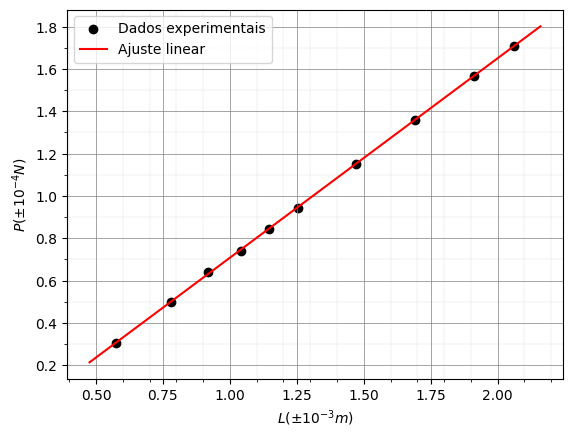

In [15]:
fig1, ax1 = grafico_papel_milimetrado(x_i, y_i)

xfit = np.linspace(x_i.min() - 0.1, x_i.max() + 0.1, 100)
yfit = a * xfit + b

ax1.plot(xfit, yfit, 'r-', label='Ajuste linear')

ax1.set_xlabel(r'$L(\pm 10^{-3}m)$')
ax1.set_ylabel(r'$P(\pm 10^{-4}N)$')

leg1 = ax1.legend()

plt.show()

Pode-se observar que o coeficiente angular é próximo de zero, ou seja, não há deformação na mola se não houver força exercida sobre ela

## Energia mecânica

Abaixo, iremos calcular as energias mecânicas para os dois referenciais: o chão do laboratório e o nível do laser. Consideramos que o comprimento inicial é $L_0 = (0, 333 ± 0, 001)m$



In [16]:
dados2 = pd.read_csv('dados_pratica5_tabela2.csv')

# Extraia os valores das colunas e atribua às variáveis
l_a = dados2.iloc[0, 0]
h_a = dados2.iloc[0, 1]
l_b = dados2.iloc[1, 0]
h_b = dados2.iloc[1, 1]


In [25]:
# Coletando os dados da tabela 3 e calculando o desvio padrão
dados3 = pd.read_csv('dados_pratica5_tabela3.csv')

# Armazenar os valores da coluna '\(t_i(s)\)' em um vetor
vetor_de_tempos = dados3['\(t_i(s)\)'].values

tmp = M(vetor_de_tempos, unidade="s")

print(tmp)
time = Medida(media(tmp))
distance = Medida("0.07+/-0.001",unidade="m")



#velocidade = Medida(distance/time)



Exception: não foi possível extrair o valor e a incerteza

### Cálculo da energia mecânica no referencial do chão

Para o cálculo do erro da energia mecânica em relação ao chão, consideramos os valores de altura e comprimento da tabela 2

In [20]:
massa = Medida("0.092+/-0.001")
gravidade = Medida("9.81")
coeficiente_elastico = Medida(f"{a/2}+/-{Delta_a/2}")
deformacao_temporaria = l_a/100 - 0.33
deformacao_a = Medida(f"{deformacao_temporaria}+/-0.001")
altura_a = Medida(f"{h_a/100}+/-0.001")

Energia_a = massa * gravidade * altura_a + coeficiente_elastico * (deformacao_a * deformacao_a)

print(f"A energia a é dada por: {Energia_a} J")

deformacao_temporaria = l_b/100 - 0.2
deformacao_b = Medida(f"{deformacao_temporaria}+/-0.002")
altura_b = Medida(f"{h_b/100}+/-0.001")
massa_div_2 = Medida("0.046+/-0.0005")


Energia_b = massa_div_2 * velocidade * velocidade + massa * gravidade * altura_b + coeficiente_elastico * deformacao_b * deformacao_b

print(f"A energia b é dada por: {Energia_b} J")

equivalencia = (Energia_a == Energia_b)

print(f"The equivalence between energy is {equivalencia}")


A energia a é dada por: 2.043±0.009  J


NameError: name 'velocidade' is not defined

### Cálculo da energia mecânica no referencial do chão

Passamos a recalcular a energia mecânica envolvida para as mesmas configurações do sistema, mas agora adotando a altura do laser como referencial para a energia potencial gravitacional. os valores de $l_a$, $l_b$, $l_0$ e $v$ permanecem, dado que o movimento realizado durante as configurações do sistema é o mesmo.

In [12]:
h_a= h_a- h_b

altura_a = Medida(f"{h_a/100}+/-0.001")
altura_b = Medida("0+/-0.1")

Energia_a = massa * gravidade * altura_a + coeficiente_elastico * (deformacao_a * deformacao_a)

print(f"A energia a é dada por: {Energia_a} J")

Energia_b = massa_div_2 * velocidade * velocidade + massa * gravidade * altura_b + coeficiente_elastico * deformacao_b * deformacao_b

print(f"A energia a é dada por: {Energia_b} J")

equivalencia = (Energia_a == Energia_b)

print(f"The equivalence between energy is {equivalencia}")


A energia a é dada por: (1.03±0.02)  J
A energia a é dada por: (0.9±0.1)  J
The equivalence between energy is True


### Conclusões
Tendo em vista a análise de equivalência, concluímos que houve conservação de
energia nos dois referenciais. Além disso, vale destacar que, para trocarmos o referencial do solo para o do nível do laser, não foi necessária nenhuma nova medição, apenas algumas operações entre as dimensões que já tínhamos calculado anteriormente.